### 사고빈도 모델링
##### 가상의 사고건수 데이터를 Poisson 분포로 피팅(fitting) 해보기
* .csv 파일 불러오기
* 데이터 시각화: histogram, bar plot
* 피팅 (.fit)
* 확률 계산 (.pmf)
* 몬테카를로 시뮬레이션 (.rvs)
* 간단한 numpy 기능

In [1]:
# 모듈 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
num_of_claims = np.loadtxt('data/num_of_claims.csv', delimiter=',')

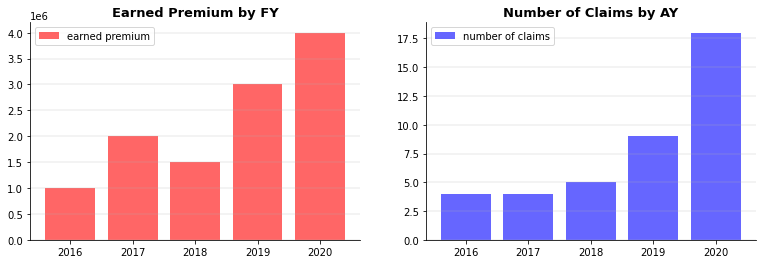

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# 막대 그래프 그리기 (1)
ax[0].bar(
    x=np.arange(2016, 2021),
    height=num_of_claims[:, 0],
    color='red',
    label='earned premium',
    alpha=0.6,
)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
ax[0].set_title('Earned Premium by FY', fontsize=13, fontweight='bold')
ax[0].grid(b=True, axis='y', linestyle='-', linewidth=0.3)


# 막대 그래프 그리기 (2)
ax[1].bar(
    x=range(2016, 2021),
    height=num_of_claims[:, 1],
    color='blue',
    label='number of claims',
    alpha=0.6,
)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
ax[1].set_title('Number of Claims by AY', fontsize=13, fontweight='bold')
ax[1].grid(b=True, axis='y', linestyle='-', linewidth=0.3)

plt.show()

In [ ]:
# 모수 추정
from scipy.stats import poisson

np.random.seed(20210110)
exposure, total_claims = num_of_claims[:, 0].sum(), num_of_claims[:, 1].sum()
lambda_ = total_claims/exposure

print(f'Poisson dist. 추정모수: λ={lambda_*1e6:.2f}e-6')

In [ ]:
# 막대 그래프 그리기
width = 0.4

plt.bar(
    x=np.arange(2016, 2021)-width/2,
    height=num_of_claims[:, 1],
    color='blue',
    label='data',
    alpha=0.6,
    width=width,
    align='center',
)

plt.bar(
    x=np.arange(2016, 2021)+width/2,
    height=num_of_claims[:, 0]*lambda_,
    color='green',
    label='expected(model)',
    alpha=0.5,
    width=width,
    align='center',
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.title('Number of Claims by AY', fontsize=13, fontweight='bold')
plt.grid(b=True, axis='y', linestyle='-', linewidth=0.3)

plt.show()

In [ ]:
# pmf(probability mass function) 시각화
unearned_premium = 5000000
freq_model_poisson_unearned = poisson(mu=lambda_*unearned_premium)
n = np.arange(30)
px = freq_model_poisson_unearned.pmf(n)

plt.bar(x=n, height=px, label='$p_{n}$')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend()
plt.show()

In [ ]:
# 몬테카를로 시뮬레이션
num_of_claim_generated = freq_model_poisson_unearned.rvs(20000)

plt.hist(x=num_of_claim_generated, bins=100, density=True, color='darkmagenta', label='simulation', alpha=0.5)
plt.xlabel(f'number of claims (for premium : {unearned_premium})')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend()
plt.show()